In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Titanic Dataset

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [3]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [5]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Removing useless variables

In [6]:
column2drop = ['PassengerId', 'Name', 'Cabin']
df.drop(column2drop, axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


### Feature Engineering

In [8]:
# number of people a passanger is travelling with
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [9]:
# if he/she is travelling alone or not
df['IsAlone'] = 1 # initialize to yes/1 is alone
df.loc[df.FamilySize > 1, 'IsAlone'] = 0 # update to no/0 if family size is greater than 1

Features SibSp and Parch are now redundant with respect to FamilySize.  

In [10]:
column2drop = ['SibSp', 'Parch']
df.drop(column2drop, axis=1, inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,A/5 21171,7.2500,S,2,0
1,1,1,female,38.0,PC 17599,71.2833,C,2,0
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,female,35.0,113803,53.1000,S,2,0
4,0,3,male,35.0,373450,8.0500,S,1,1


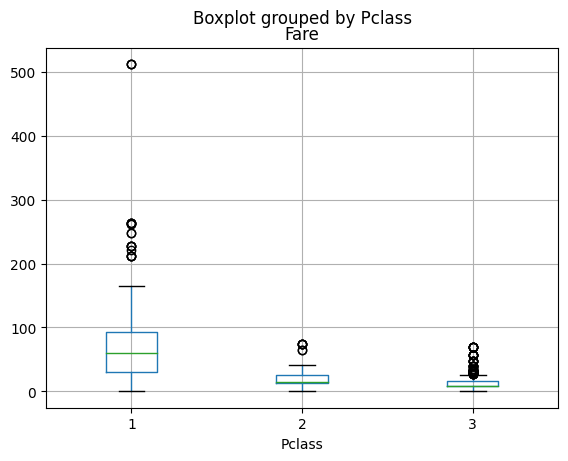

In [12]:
# examining Fare feature
df.boxplot(['Fare'], by='Pclass', showfliers=True)
plt.show()

In [13]:
dupl_df = df[df.duplicated('Ticket', keep=False)]
dupl_df

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
3,1,1,female,35.0,113803,53.1000,S,2,0
7,0,3,male,2.0,349909,21.0750,S,5,0
8,1,3,female,27.0,347742,11.1333,S,3,0
9,1,2,female,14.0,237736,30.0708,C,2,0
10,1,3,female,4.0,PP 9549,16.7000,S,3,0
...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.0,7534,9.8458,S,1,1
879,1,1,female,56.0,11767,83.1583,C,2,0
880,1,2,female,25.0,230433,26.0000,S,2,0
885,0,3,female,39.0,382652,29.1250,Q,6,0


In [14]:
std = dupl_df[['Fare', 'Ticket']].groupby(['Ticket']).std()
std

,Fare
Ticket,
110152,0.0
110413,0.0
110465,0.0
111361,0.0
113505,0.0
...,...
SC/Paris 2123,0.0
STON/O2. 3101279,0.0
W./C. 6607,0.0


In [15]:
std[std['Fare'] > 0]

,Fare
Ticket,
7534,0.444841


In [16]:
df[df['Ticket'] == '7534']

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
138,0,3,male,16.0,7534,9.2167,S,1,1
876,0,3,male,20.0,7534,9.8458,S,1,1


In [17]:
df[df['Ticket'] == '110152']

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
257,1,1,female,30.0,110152,86.5,S,1,1
504,1,1,female,16.0,110152,86.5,S,1,1
759,1,1,female,33.0,110152,86.5,S,1,1


It looks like Fare is cumulative with respect to various Tickets with the same identifier. Consequently we proceed in correcting the Fare of each passenger by dividing it with the number of Tickets with the same identifier.

In [18]:
ticket_map = dict(df['Ticket'].value_counts()) # n. of occurrencies by ticket
df['NumTickets'] = df['Ticket'].map(ticket_map) # creates new column based on the value counts map

In [19]:
df['Fare'] = df['Fare']/df['NumTickets']

In [20]:
df[df['Ticket'] == '110152']

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone,NumTickets
257,1,1,female,30.0,110152,28.833333,S,1,1,3
504,1,1,female,16.0,110152,28.833333,S,1,1,3
759,1,1,female,33.0,110152,28.833333,S,1,1,3


The features NumTickets and Ticket helped in correcting Fare and we do not need theme any more.  

In [21]:
column2drop = ['NumTickets', 'Ticket']
df.drop(column2drop, axis=1, inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,2,0
1,1,1,female,38.0,71.2833,C,2,0
2,1,3,female,26.0,7.9250,S,1,1
3,1,1,female,35.0,26.5500,S,2,0
4,0,3,male,35.0,8.0500,S,1,1


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# label encoding Sex feature
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [25]:
# one-hot encoding of categorical data
categorical_cols = ["Embarked"]
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,0,0,1
1,1,1,0,38.0,71.2833,2,0,1,0,0
2,1,3,0,26.0,7.9250,1,1,0,0,1
3,1,1,0,35.0,26.5500,2,0,0,0,1
4,0,3,1,35.0,8.0500,1,1,0,0,1


### Partitioning

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
attributes = [col for col in df.columns if col != 'Survived']
X = df[attributes].values
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # we use 70% and 30% and we stratisfy to have the same distribution for the classes between them in the training and in the test set

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
dt = DecisionTreeClassifier()

In [32]:
%%time
dt.fit(X_train, y_train)

CPU times: user 1.6 ms, sys: 770 µs, total: 2.37 ms
Wall time: 1.69 ms


DecisionTreeClassifier()

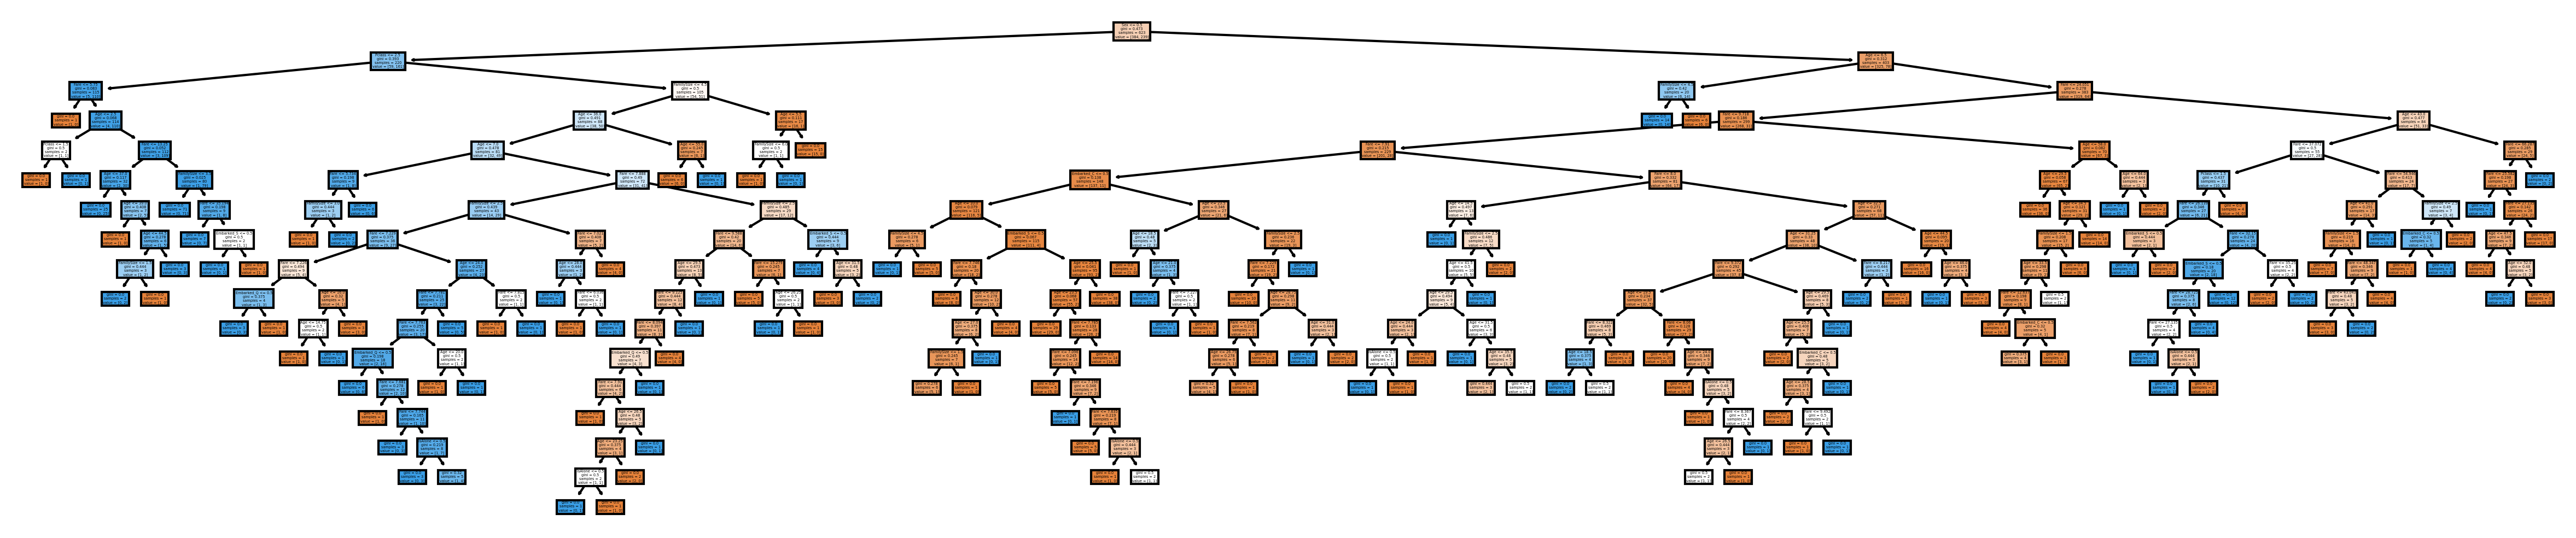

In [33]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [34]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [35]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [36]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9839486356340289
Train F1-score [0.9871134 0.9787234]

Test Accuracy 0.7686567164179104
Test F1-score [0.81656805 0.68686869]


In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.72      0.66      0.69       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



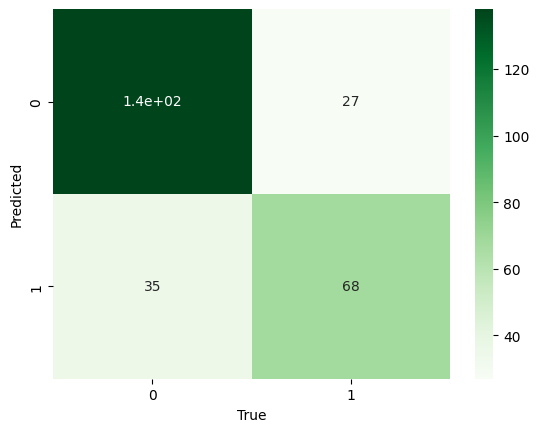

In [38]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Feature Importance

In [39]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Sex 0.2925058533225051
Fare 0.22945396297850182
Age 0.210349342640417
FamilySize 0.10796073539373202
Pclass 0.10480494396787327
Embarked_S 0.016810379092804507
IsAlone 0.014956643298779682
Embarked_C 0.014346866291048126
Embarked_Q 0.00881127301433849


We can eliminate maybe some of the irrelevant features in the classification logic to have a tree easier to interpret, with less features and splits.  

#### Decision Tree hyperparameters
This is one of the pre pruning parameter that we can set, we can say the number of max levels of layer of the tree that we have and the generation will stop. We can also decide whic by default is none, the generation will go until a condition is meet. 
max_depth : int, default=None <br>
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2 <br>
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

min_samples_leaf : int or float, default=1 <br>
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

In [40]:
from sklearn.model_selection import cross_val_score

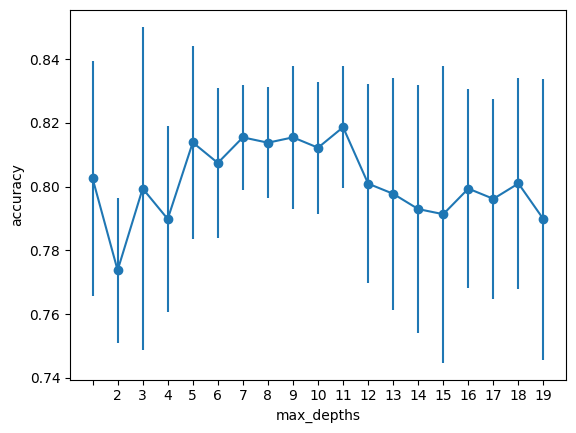

In [ ]:
max_depths =  list(np.arange(2, 20)) + [None]
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

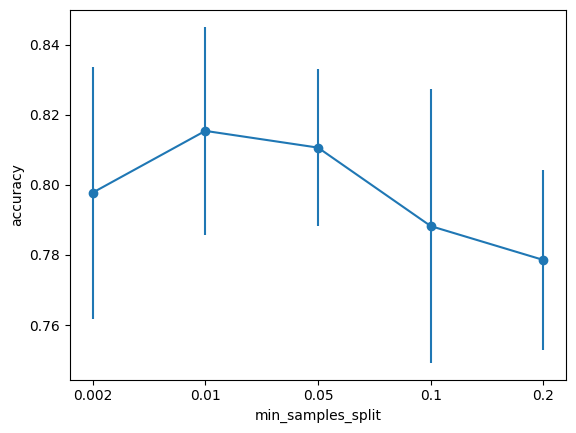

In [42]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split") 
plt.ylabel("accuracy")
plt.show()

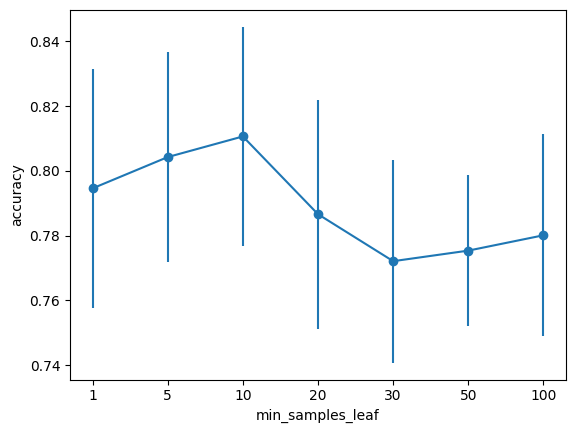

In [43]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized Search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [45]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: user 1.22 s, sys: 120 ms, total: 1.34 s
Wall time: 2.35 s


In [46]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 6, 'criterion': 'entropy'} 0.8197380645161289


In [47]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.7985074626865671


In [48]:
clf.score(X_test, y_test)

0.7985074626865671

In [49]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9839486356340289
Train F1-score [0.9871134 0.9787234]

Test Accuracy 0.7985074626865671
Test F1-score [0.84393064 0.71578947]


There is a problem in this model: the dataset is unbalanced, respect to the performance the smallest number is the 0,66, the recall respect to class 1. The main problem of this model is that is not able to identify equal well who are going to survive, and is not very accurate, precise. The F1 between the two classes are quite different, the performance are not bad for people that are going to die but bad for people who are going to die. One of the comment that we can make in the report, talking about overfitting.

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       165
           1       0.78      0.66      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [51]:
results = pd.DataFrame(random_search.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

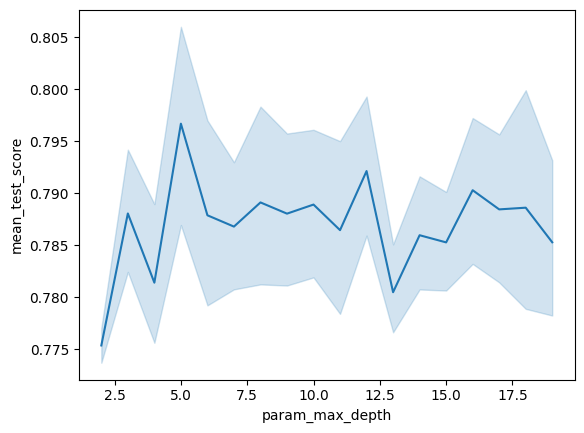

In [52]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

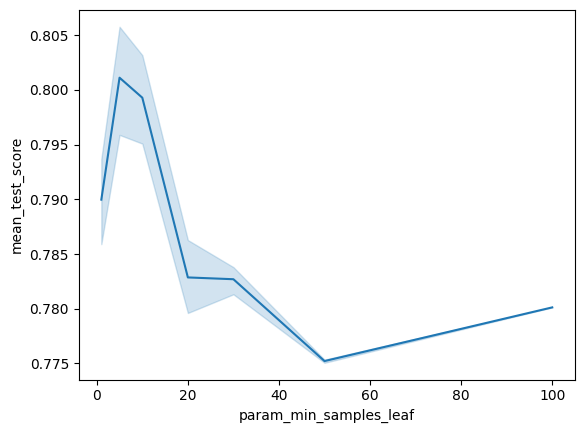

In [53]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [54]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Sex 0.39778129315077004
Fare 0.17911856080333222
Pclass 0.17620819727107945
Age 0.1603205703288419
FamilySize 0.08657137844597641
IsAlone 0.0
Embarked_C 0.0
Embarked_Q 0.0
Embarked_S 0.0


Possiamo mettere nell'elaborato l'albero visualizzato non graficamente ma gerarchimanete scritto con la libreria. 

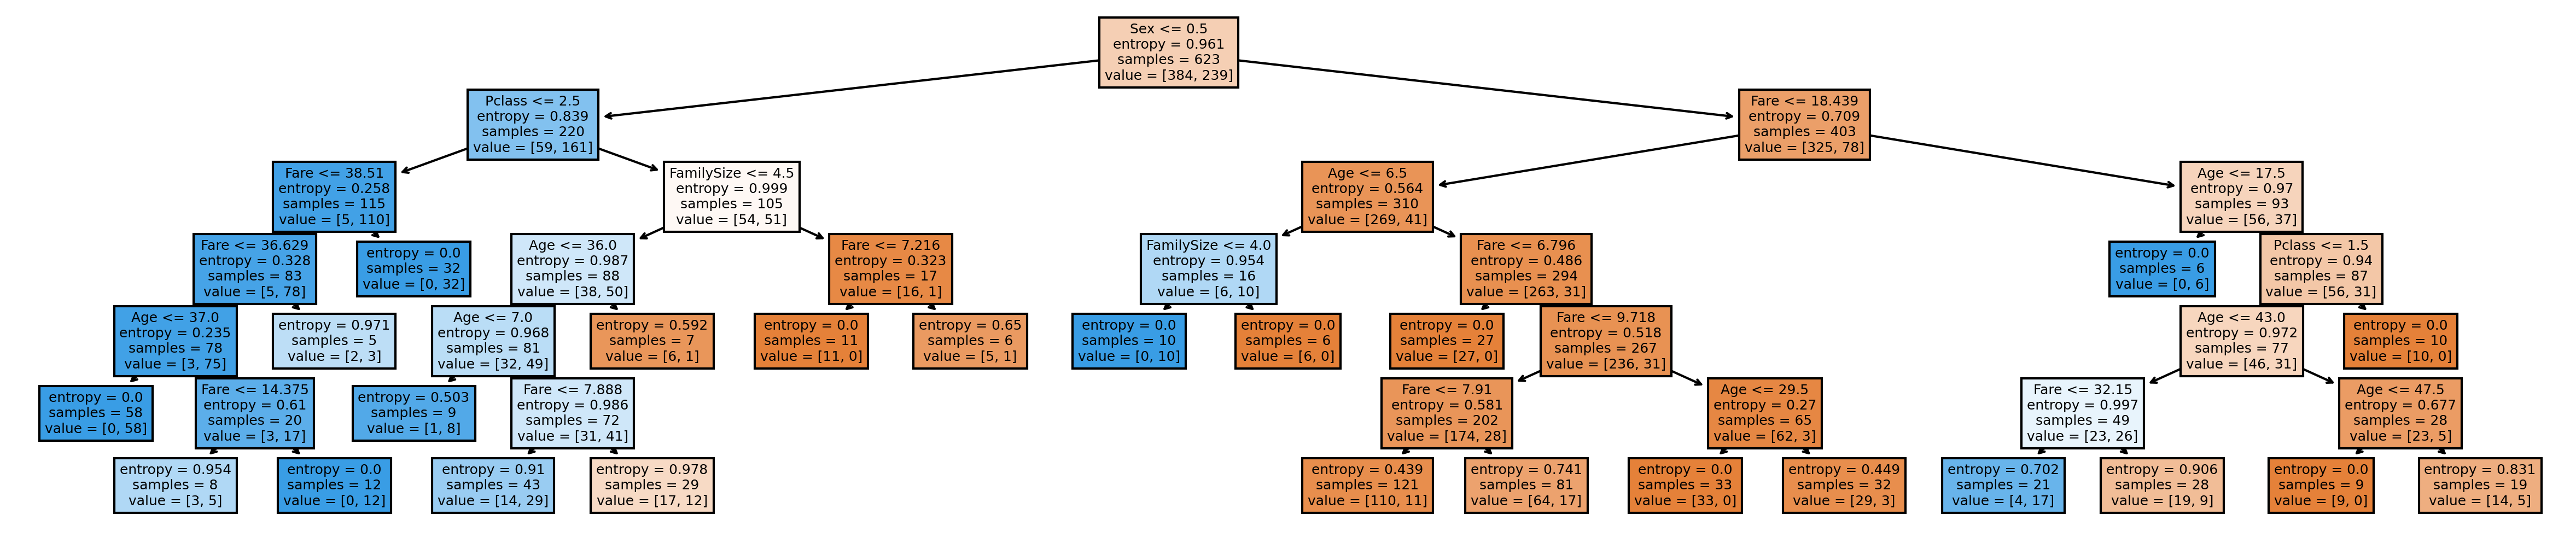

In [55]:
plt.figure(figsize=(20, 4), dpi=300) 
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

#### ccp_alphas 
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. <br>
Sklearn decision tree offers a function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [56]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [57]:
for alpha, imp in zip(ccp_alphas, impurities):
    print(alpha, imp)

0.0 0.4469430195605467
0.002546924191598148 0.44948994375214485
0.005066386808475043 0.4545563305606199
0.00509660587730797 0.4596529364379279
0.005102524579096698 0.46985798559612124
0.005945984720778667 0.49364192447923594
0.006069825071097476 0.5057815746214309
0.006849358135479905 0.5126309327569109
0.0073289263031031116 0.519959859060014
0.012130531247433607 0.5563514528023148
0.013540925181267344 0.5698923779835822
0.020281486445945185 0.5901738644295274
0.024511948710753514 0.6146858131402808
0.026575801436787172 0.641261614577068
0.03333081727991133 0.6745924318569794
0.08015292294157314 0.7547453547985525
0.20581849199058122 0.9605638467891338


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

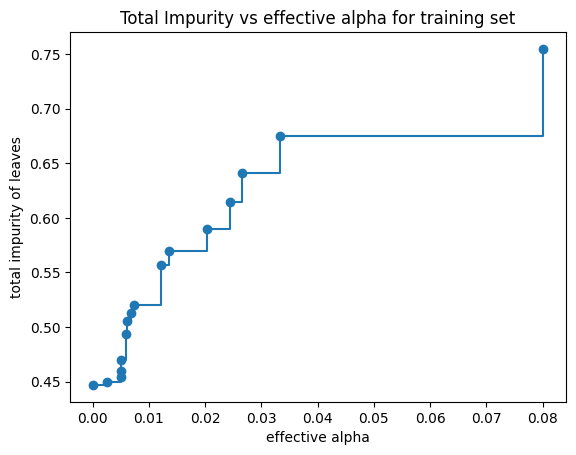

In [58]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [59]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 6,
 'criterion': 'entropy'}

In [60]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.20581849199058122


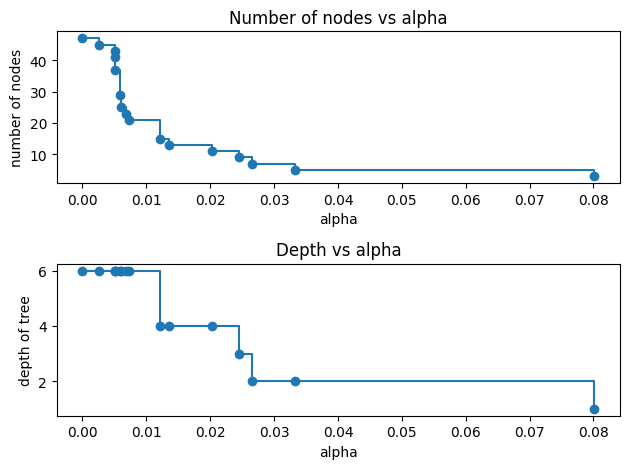

In [61]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

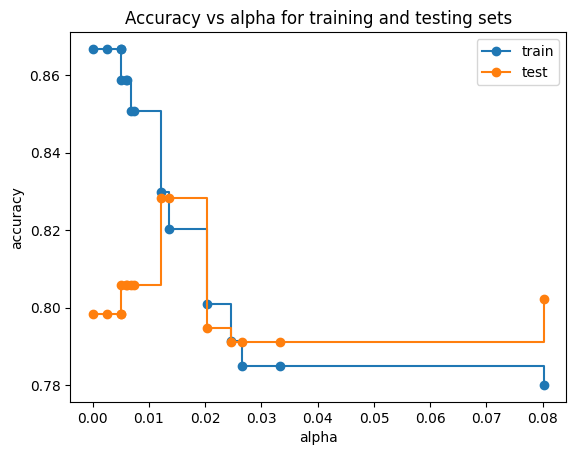

In [62]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, criterion='entropy', max_depth=6,
                       min_samples_leaf=5, min_samples_split=5, random_state=0)

In [64]:
y_test_pred = dtp.predict(X_test)

In [65]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9839486356340289
Train F1-score [0.9871134 0.9787234]

Test Accuracy 0.8059701492537313
Test F1-score [0.8452381 0.74     ]


In [66]:
y_test_pred = dtp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.8059701492537313


In [67]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       165
           1       0.76      0.72      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



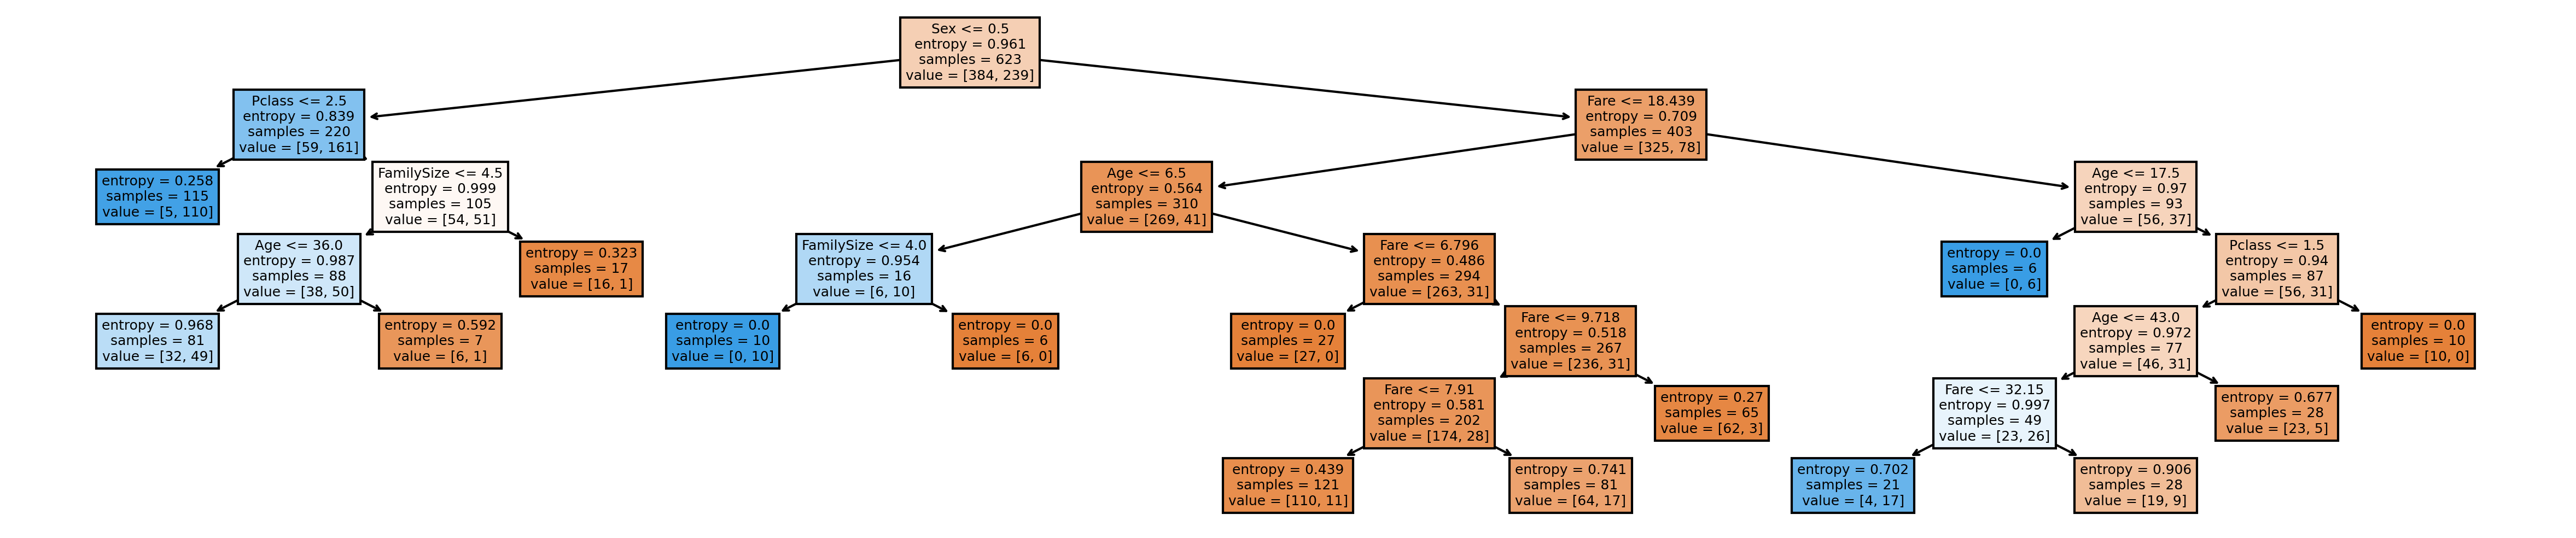

In [68]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

In [69]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

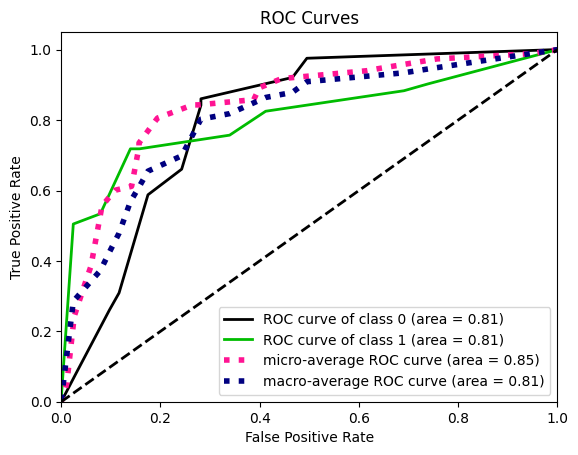

In [70]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

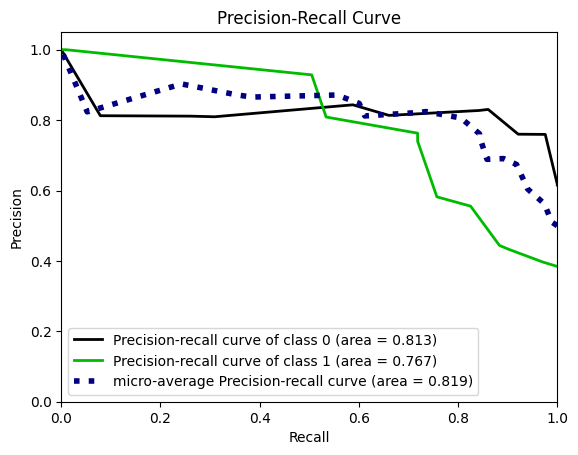

In [71]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()